In [34]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import mock_ledger
from  desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask
import matplotlib.pyplot as plt
from astropy.table import join

In [36]:
import sys
#sys.path.append('/global/homes/l/lbigwood/LSS/py')
sys.path.append('/global/homes/l/lbigwood/S4Mock/')

import S4Mock_io
import geometry
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

nside=32
orig_density_per_deg = 2500
pixel_area = hp.nside2pixarea(nside,degrees=True)

In [37]:
mxxl = S4Mock_io.read_mxxl(small=True)
small_pix_list = np.unique(mxxl['HPX'].data)

In [38]:
small_pix_list

array([4517, 4518, 4519, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528,
       4530, 4531, 4536, 4537, 4538, 4539, 4540, 4542, 4543, 4864, 4865,
       4867, 4868, 4869, 4870, 4871, 4876, 4877, 4879, 4880, 4881, 4882,
       4883, 4884, 4885, 4886, 4887, 4888, 4889, 4890, 4891, 4892, 4912])

In [16]:
#small_pix_list = small_pix_list[(small_pix_list>400)&(small_pix_list<500)]
#small_pix_list

In [ ]:
t = mock_ledger.create_mock_ledger_hp(outdir=None, healpix = small_pix_list[0], nside=32,small=False, mxxl=None,overwrite=False)


for i in range(1,len(small_pix_list)):
    new_t = mock_ledger.create_mock_ledger_hp(outdir=None, healpix = small_pix_list[i], nside=32, mxxl=None, small=False, overwrite=False)
    t = join(t,new_t,join_type='outer')
    

In [39]:
t

RA,DEC,PARALLAX,PMRA,PMDEC,REF_EPOCH,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,PRIORITY,NUMOBS,NUMOBS_MORE,Z,ZWARN,TIMESTAMP,VERSION,TARGET_STATE,ZTILEID,SV3_SCND_TARGET
float64,float64,float32,float32,float32,float32,int64,int64,int64,int64,float64,int32,int64,int64,int64,int64,int64,float64,int64,str25,str14,str30,int32,int64
0.00012028223324816613,4.590174774263273,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230396565390568,0.05280772802984479,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
0.00017671921799611382,2.450336345190961,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230396565390452,0.3913139047786407,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
0.00038805115295057765,9.925295719125693,0.0,0.0,0.0,0.0,1152921504606846976,257,0,288230396754132996,0.361740364595194,516,102000,3,102000,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
0.0004987679279071001,9.24821796074684,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230396615721611,0.692856181228386,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
0.0005709041152050272,8.805254696376288,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230396615722162,0.6562406051759828,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
0.0006349205915355455,7.509030230865826,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230396615721565,0.04441973495544793,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
0.0007502216483701042,6.238983602154996,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230396603138974,0.35344457645020166,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
0.0008003174063479358,8.798342831036633,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230396615722163,0.31286770547495435,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
0.0009510469857677616,9.826746966323892,0.0,0.0,0.0,0.0,1152921504606846976,265,0,288230396754133045,0.37652308386891997,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0


In [27]:
mock_bright = t[((t['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)]
mock_faint = t[((t['SV3_BGS_TARGET'] & bgs_mask['BGS_FAINT']) != 0)]

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


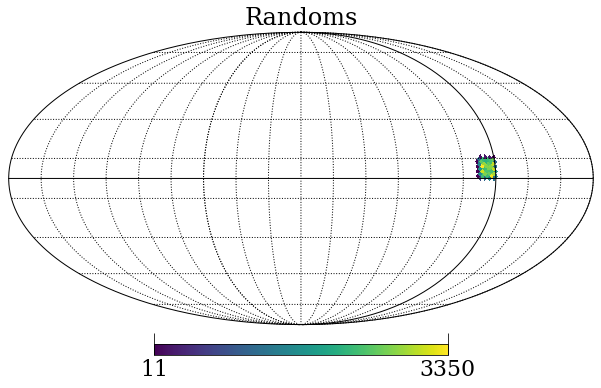

In [40]:
bright_target_pixel_density = geometry.targ_hpmap(mock_bright)

hp.mollview(bright_target_pixel_density,nest=True,rot=(120, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

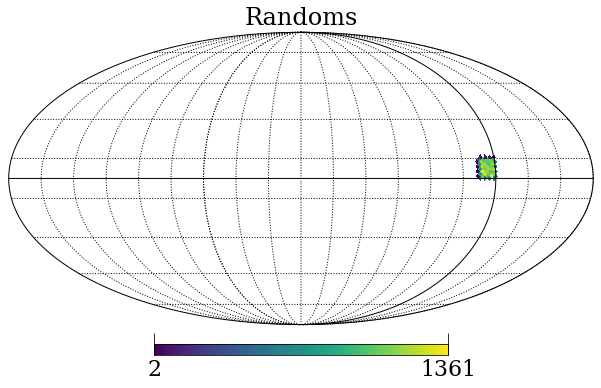

In [42]:
faint_target_pixel_density = geometry.targ_hpmap(mock_faint)
hp.mollview(faint_target_pixel_density,nest=True,rot=(120, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

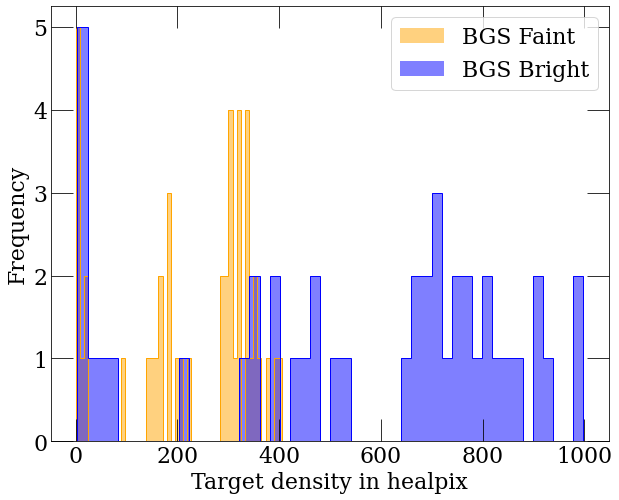

In [43]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

_ = plt.hist(faint_target_pixel_density/pixel_area, bins=50,histtype='bar',alpha=0.5,color='orange',label='BGS Faint')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=50,histtype='bar',alpha=0.5,color='blue',label='BGS Bright')
_ = plt.hist(faint_target_pixel_density/pixel_area, bins=50,histtype='step',color='orange')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=50,histtype='step',color='blue')

plt.xlabel('Random filling factor')
plt.xlabel('Target density in healpix')
#plt.xlim(0,1560)
plt.ylabel('Frequency')
plt.legend()

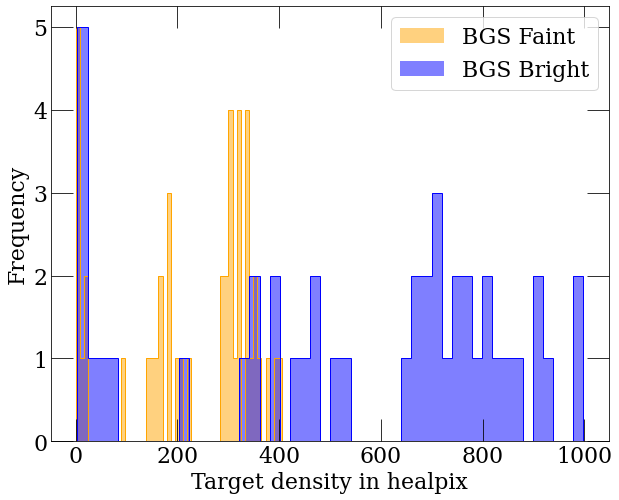

In [44]:
#repeating what did above but checking this other method 

mxxl = S4Mock_io.read_mxxl(small=True)
small_pix_list = np.unique(mxxl['HPX'].data)

mxxl_bright = mxxl[(mxxl['APP_MAG'] <= 19.5)]
mxxl_faint = mxxl[(mxxl['APP_MAG'] > 19.5) & (mxxl['APP_MAG'] <= 20.175)]

bright_target_pixel_density = geometry.targ_hpmap(mxxl_bright)
faint_target_pixel_density = geometry.targ_hpmap(mxxl_faint)

plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

_ = plt.hist(faint_target_pixel_density/pixel_area, bins=50,histtype='bar',alpha=0.5,color='orange',label='BGS Faint')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=50,histtype='bar',alpha=0.5,color='blue',label='BGS Bright')
_ = plt.hist(faint_target_pixel_density/pixel_area, bins=50,histtype='step',color='orange')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=50,histtype='step',color='blue')

plt.xlabel('Random filling factor')
plt.xlabel('Target density in healpix')
#plt.xlim(0,1560)
plt.ylabel('Frequency')
plt.legend()

In [65]:

#sv3 pix incase need for later
sv3 = S4Mock_io.read_sv3_ledgers(mock=False)
pix = geometry.radec2pix(sv3['RA'],sv3['DEC'])
pix = np.array(np.unique(pix))


Runtime of 0.101333 seconds after 0 pixels
Runtime of 11.118526 seconds after 100 pixels


Total runtime of 20.936449 seconds after 200000 pixels


In [66]:
pix

array([2286, 2287, 2333, 2334, 2335, 2356, 2357, 2376, 2378, 2400, 2447,
       2451, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462,
       2468, 2469, 2471, 2477, 2480, 2481, 2482, 2483, 2484, 2488, 2495,
       2496, 2498, 2504, 2536, 2537, 2538, 2539, 2549, 2551, 2557, 2559,
       2570, 2592, 2593, 2594, 2595, 2600, 2601, 2602, 2628, 2629, 2630,
       2631, 2679, 2685, 2803, 2806, 2807, 2809, 2812, 2813, 2837, 2850,
       2851, 2856, 2857, 2880, 2881, 2901, 2903, 2978, 2984, 3834, 3835,
       3838, 3839, 4010, 4011, 6398, 6399, 6475, 6476, 6477, 6478, 6479,
       6481, 6482, 6483, 6484, 6486, 6488, 6489, 6490, 6491, 6492, 6493,
       6494, 6495, 6497, 6500, 6501, 6502, 6503, 6509, 6511, 6512, 6513,
       6514, 6515, 6516, 6517, 6518, 6520, 6521, 6522, 6523, 6562, 6563,
       6568, 6569, 6570, 6571, 6572, 6574, 6608, 6609, 6740, 6741, 6743,
       6809, 6811, 6812, 6814, 6815, 6833, 6836, 6837, 6912, 6914, 7005,
       7006, 7007, 7025, 7027, 7028, 7029, 7030, 70

In [69]:
mxxl = S4Mock_io.read_mxxl(small=False)

In [70]:
small_pix_list = np.unique(mxxl['HPX'].data)

In [71]:
small_pix_list

array([    0,     1,     2, ..., 12285, 12286, 12287])

In [48]:
mxxl = mxxl[np.in1d(mxxl['HPX'].data,small_pix_list)]

In [49]:
mxxl

RA,DEC,Z_OBS,APP_MAG,HPX
float32,float32,float32,float32,int64
41.0358,6.5212903,0.65769726,20.394506,33
47.629047,5.619485,0.58567053,20.46458,7
42.052193,7.602356,0.5849819,20.115883,36
50.120495,7.9311357,0.55003685,19.977818,19
41.999706,4.760089,0.55236286,20.201677,10
37.436264,7.5461707,0.47250515,20.532604,34
42.51883,5.816329,0.4753499,19.68089,11
46.50336,5.294704,0.49309415,20.174555,6
43.498226,10.121886,0.4276428,20.529518,37


In [57]:
mxxl_bright = mxxl[(mxxl['APP_MAG'] <= 19.5)]
mxxl_faint = mxxl[(mxxl['APP_MAG'] > 19.5) & (mxxl['APP_MAG'] <= 20)]

In [58]:
mxxl_faint

RA,DEC,Z_OBS,APP_MAG,HPX
float32,float32,float32,float32,int64
50.120495,7.9311357,0.55003685,19.977818,19
42.51883,5.816329,0.4753499,19.68089,11
52.528168,11.729013,0.40549085,19.839989,29
55.883507,11.963562,0.38423568,19.743515,66
57.99985,11.2312355,0.3960398,19.614021,65
38.271606,11.1013775,0.38751265,19.713856,46
38.972157,6.25156,0.35257265,19.748087,32
48.002792,6.058677,0.34248826,19.946905,7
43.36722,14.066713,0.30237928,19.530613,57


In [59]:
bright_target_pixel_density = geometry.targ_hpmap(mxxl_bright)

In [60]:
faint_target_pixel_density = geometry.targ_hpmap(mxxl_faint)

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


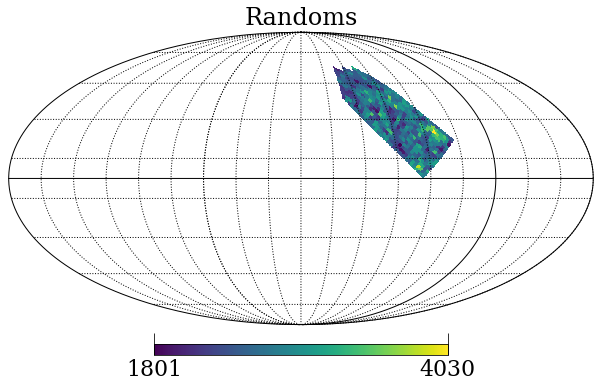

In [61]:
hp.mollview(bright_target_pixel_density,nest=True,rot=(120, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

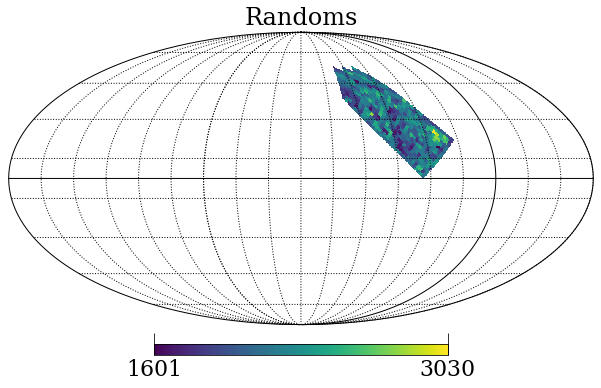

In [62]:
hp.mollview(faint_target_pixel_density,nest=True,rot=(120, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

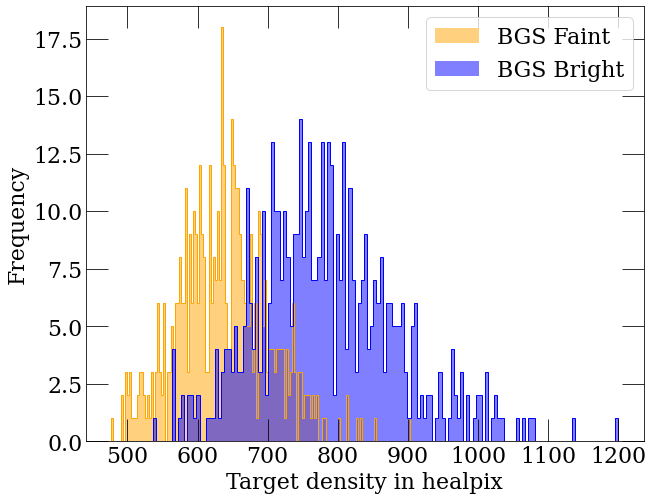

In [64]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

_ = plt.hist(faint_target_pixel_density/pixel_area, bins=150,histtype='bar',alpha=0.5,color='orange',label='BGS Faint')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=150,histtype='bar',alpha=0.5,color='blue',label='BGS Bright')
_ = plt.hist(faint_target_pixel_density/pixel_area, bins=150,histtype='step',color='orange')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=150,histtype='step',color='blue')

plt.xlabel('Random filling factor')
plt.xlabel('Target density in healpix')
#plt.xlim(0,10000)
plt.ylabel('Frequency')
plt.legend()

In [ ]:
Footnote 2 in Alex's PIP paper: In Section 2.4 we use rbright = 19.452 and rfaint = 19.925,
which in the BGS mock catalogue gives number densities of
818 deg−2 and 618 deg−2